In [2]:
import os

while "src" not in os.listdir():
    assert "/" != os.getcwd(), "src directory not found"
    os.chdir("..")


import sys
sys.path.append('simclr-pytorch')

import torch
from torch import nn
import models

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from src.lib.resnet_loader import load_contrastive_resnet50, load_classifier_resnet50


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [3]:
contrastive_feature_resnet = load_contrastive_resnet50('./pretrained_models/resnet50_imagenet_bs2k_epochs600.pth.tar', device=device)
classifier_feature_resnet = load_classifier_resnet50(device=device)

IMAGENET_PATH = /home/aashukha/imagenet/raw-data/
======> Encoder: output dim 2048 | 25.557M parameters


In [4]:
#print classifier feature named parameters
for name, param in classifier_feature_resnet.named_parameters():
    print(name, param.size())

resnet.conv1.weight torch.Size([64, 3, 7, 7])
resnet.bn1.weight torch.Size([64])
resnet.bn1.bias torch.Size([64])
resnet.layer1.0.conv1.weight torch.Size([64, 64, 1, 1])
resnet.layer1.0.bn1.weight torch.Size([64])
resnet.layer1.0.bn1.bias torch.Size([64])
resnet.layer1.0.conv2.weight torch.Size([64, 64, 3, 3])
resnet.layer1.0.bn2.weight torch.Size([64])
resnet.layer1.0.bn2.bias torch.Size([64])
resnet.layer1.0.conv3.weight torch.Size([256, 64, 1, 1])
resnet.layer1.0.bn3.weight torch.Size([256])
resnet.layer1.0.bn3.bias torch.Size([256])
resnet.layer1.0.downsample.0.weight torch.Size([256, 64, 1, 1])
resnet.layer1.0.downsample.1.weight torch.Size([256])
resnet.layer1.0.downsample.1.bias torch.Size([256])
resnet.layer1.1.conv1.weight torch.Size([64, 256, 1, 1])
resnet.layer1.1.bn1.weight torch.Size([64])
resnet.layer1.1.bn1.bias torch.Size([64])
resnet.layer1.1.conv2.weight torch.Size([64, 64, 3, 3])
resnet.layer1.1.bn2.weight torch.Size([64])
resnet.layer1.1.bn2.bias torch.Size([64])
re

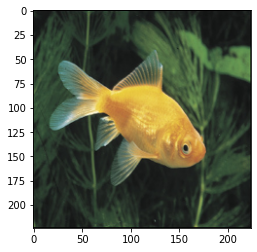

In [3]:
img = Image.open('data/imagenet-sample-images/n01443537_goldfish.JPEG')
# resize to 224x224
img = img.resize((224, 224))
img = np.array(img)
# copy image 32 times over first axis
img = np.tile(img[np.newaxis], (32, 1, 1, 1))
img = img.transpose((0, 3, 1, 2))
img = torch.from_numpy(np.array(img)).float()
# img = img.unsqueeze(0)
img = img.to(device)

plt.imshow(img.cpu().numpy()[0].transpose((1, 2, 0))/255)
plt.show()



In [4]:
with torch.no_grad():
    out = contrastive_feature_resnet(img)
    out = out.detach().cpu().numpy()

print(out.shape)

(32, 2048, 7, 7)


In [6]:
with torch.no_grad():
    out = classifier_feature_resnet(img)
    out = out.detach().cpu().numpy()

print(out.shape)

(32, 2048, 7, 7)
